# **Install Raw Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
train_data=pd.read_csv("drive/MyDrive/NLU 2022/agNews/train.csv",header=0,names=['classid','title','desc'], nrows = 100)
test_data=pd.read_csv("drive/MyDrive/NLU 2022/agNews/test.csv",header=0,names=['classid','title','desc'], nrows = 10)

In [ ]:
train_data.head()

,classid,title,desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


3    78
4    22
Name: classid, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


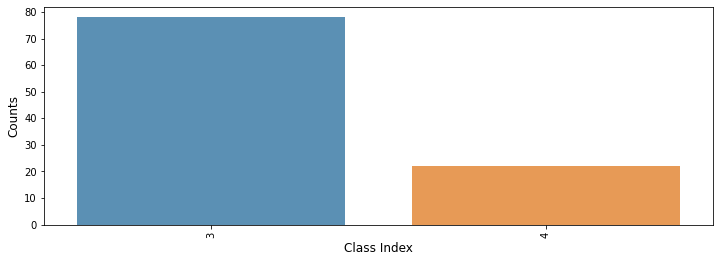

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train_class = train_data['classid'].value_counts()
print(train_class)

plt.figure(figsize=(12,4))
sns.barplot(train_class.index, train_class.values, alpha=0.8)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Class Index', fontsize=12)
plt.xticks(rotation=90)
plt.show()

4    9
3    1
Name: classid, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


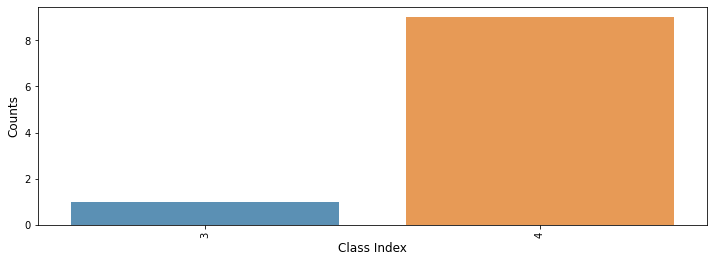

In [ ]:
test_class = test_data['classid'].value_counts()
print(test_class)

plt.figure(figsize=(12,4))
sns.barplot(test_class.index, test_class.values, alpha=0.8)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Class Index', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# **Preprocessing**

In [ ]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords_1 = stopwords + ["dont"]

keep_words = ['of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'no', 'nor', 'not', 'be', 'do', 'can', 'have']

stopwords_2 = []
for stop in stopwords:
  if stop not in keep_words:
    stopwords_2.append(stop)

raw_train_title_list = train_data['title'].values.tolist()
raw_train_description_list = train_data['desc'].values.tolist()

In [ ]:
def is_num(num):
  pattern = re.compile(r'[-+]?[0-9\.,]*[0-9][a-zA-Z]*$')
  result = pattern.match(num)
  return result

def is_be(word):
	pattern = ['be', 'is', 'are', 'am', 'was', 'were', 'being', 'been']
	return word in pattern

def is_do(word):
	pattern = ['do', 'does', 'did', 'doing', 'done']
	return word in pattern

def is_dont(word):
  pattern = ["don't", "doesn't"]
  return word in pattern

def is_cant(word):
  pattern = ["cannot", "can't"]
  return word in pattern

def is_have(word):
	pattern = ['have', 'has', 'had', 'having']
	return word in pattern

def is_will(word):
	pattern = ['shall', 'should', 'will', 'would', 'd', 'll']
	return word in pattern

def is_get(word):
	pattern = ['get', 'gets', 'got', 'gotten', 'getting']
	return word in pattern

def is_seem(word):
	pattern = ['seem', 'seeming', 'seems', 'seemed']
	return word in pattern

def is_a(word):
	pattern = ['a', 'the', 'an', 'this', 'that']
	return word in pattern

def is_good(word):
  pattern = ['good', 'better', 'best']
  return word in pattern

def is_bad(word):
  pattern = ['bad', 'worse', 'worst']
  return word in pattern

def trans_num(title):
  title_list = title.split(" ")
  new_title = []
  for word in title_list:
    if (is_num(word)):
      word = "isnum"
    new_title.append(word)
  new_title = " ".join(new_title)
  return new_title

In [ ]:
def preprocess(raw_title):
  raw_lists = raw_title.split(" ")
  title = []
  
  for raw in raw_lists:
		#1. Case Folding
    raw = str(raw.lower())
		#2. Lab Numbers
    new_raw = trans_num(raw)
		#3. Remove Punctuations
    letters_only = re.sub("[^a-zA-Z0-9]", " ", new_raw)
    word_1 = " ".join(letters_only.split())
    words = word_1.split(" ")
	 	#4. Stemming & Lemmatization
    for word in words:
      if (word == ""):
        word = ""
      elif (is_be(word)):
        word = "be"
      elif (is_do(word)):
        word = "do"
      elif (is_dont(word)):
        word = "do not"
      elif (is_cant(word)):
        word = "can not"
      elif (is_have(word)):
        word = "have"
      elif (is_will(word)):
        word = "will"
      elif (is_get(word)):
        word = "get"
      elif (is_seem(word)):
        word = "seem"
      elif (is_a(word)):
        word = "a"
      elif (is_num(word)):
        word = "is_num"
      elif (is_good(word)):
        word = "good"
      elif (is_bad(word)):
        word = "bad"
      elif (word[-3:] == "ing") & (len(word) > 5):
        if word[-4] == word[-5]:
          word = word[:-4]
        elif word[-5] in ['a', 'e', 'i', 'o', 'u']:
          word = word[:-3] + 'e'
        else:
          word = word[:-3]
      elif(word[-3:] == "ies"):
        word = word[:-3] + "y"
      elif (word[-2:] == "ed") & (len(word) > 5):
        word = word[:-2]
      elif (word[-1] == "s") & (len(word) > 3):
        word = word[:-1]
			# 5.1 remove all stopwords
			# if word not in stopwords_1:
			# 	title.append(word)
			# 5.2 remove partial stopwords
			# if word not in stopwords_2:
			# 	title.append(word)
		#5.3 keep stopwords
    title.append(word)
  title = " ".join(title)
  return title

In [ ]:
title_list = []
description_list = []

for title in raw_train_title_list:
  title_list.append(preprocess(title))

for description in raw_train_description_list:
  description_list.append(preprocess(description))

In [ ]:
train_total = []

for i in range(len(title_list)):
  train_total.append(" ".join(title_list[i].split()) + ' ' + " ".join(description_list[i].split()))

In [ ]:
train_total[0]

'wall st bear claw back into a black reuter reuter seller wall s band of cynic be se green again'

In [ ]:
test_total = []
raw_test_title_list = test_data['title'].values.tolist()
raw_test_description_list = test_data['desc'].values.tolist()

for i in range(len(raw_test_title_list)):
  title = preprocess(raw_test_title_list[i])
  description = preprocess(raw_test_description_list[i])
  test_total.append(" ".join(title.split()) + ' ' + " ".join(description.split()))

In [ ]:
test_total[0]

'fear for t n pension after talk union represent worker at turner newall say they be disappoint after talk with stricken parent firm federal mogul'

# **Word Preprocessing**

### TF-IDF

In [ ]:
import math

def tf(word, sentence):
  count = 0
  for i in sentence:
    if word == i:
      count += 1
  return count

def idf(word):
  total = len(train_total)
  count = 0
  train_sentences = []
  for sentence in train_total:
    if word in sentence.split(" "):
      count += 1
  value_1 = total / (count + 1)
  value_2 = math.log(value_1)
  value = round(value_2, 2)
  return value

### Bag-of-words

In [ ]:
bag = []
train_sentences = []
test_sentences = []

for sentence in train_total:
	for word in sentence.split(" "):
		if word not in bag:
			bag.append(word)
	train_sentences.append(sentence.split(" "))

for sentence in test_total:
	test_sentences.append(sentence.split(" "))

In [ ]:
def bow1_sentence2vector(sentence):
	vector = []
	for i in range(len(bag)):
		vector.append(0)
	for word in set(sentence):
		tf_value = tf(word, sentence)
		idf_value = idf(word)
		if word in bag:
			index = bag.index(word)
			vector[index] = tf_value * idf_value

	return vector

In [ ]:
X_train = []
X_test = []

for sentence in train_total:
  X_train.append(bow1_sentence2vector(sentence))

for sentence in test_total:
	X_test.append(bow1_sentence2vector(sentence))

In [ ]:
len(X_train[1])

1351

# **Models**

### K-means

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
true_k = 2
clustering_model = KMeans(n_clusters = true_k, 
                          init = 'k-means++',
                          max_iter = 300, n_init = 10)
clustering_model.fit(np.array(X_train))
 
clustering_model.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
clustering_model.predict(np.array(X_test))

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

### Fuzzy C Means

In [ ]:
!pip install fuzzy-c-means

     |████████████████████████████████| 10.9 MB 5.3 MB/s 


In [ ]:
from fcmeans import FCM

In [ ]:
fcm = FCM(n_clusters=2)

In [ ]:
fcm.fit(np.array(X_train))

In [ ]:
fcm.predict(np.array(X_test))

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
test_data['classid'].values.tolist()

[3, 4, 4, 4, 4, 4, 4, 4, 4, 4]

### LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda = LatentDirichletAllocation(n_components=2, random_state=0)

In [ ]:
lda.fit(np.array(X_train))

doc_topic_dist_unnormalized = np.matrix(lda.transform(np.array(X_test)))

In [ ]:
doc_topic_dist = doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)
doc_topic_dist

matrix([[9.97003080e-01, 2.99692002e-03],
        [9.98330715e-01, 1.66928469e-03],
        [9.98018804e-01, 1.98119634e-03],
        [9.98193063e-01, 1.80693746e-03],
        [9.97529400e-01, 2.47059973e-03],
        [9.99463436e-01, 5.36564302e-04],
        [9.99214606e-01, 7.85394399e-04],
        [9.99328914e-01, 6.71085684e-04],
        [9.95235386e-01, 4.76461398e-03],
        [9.96929472e-01, 3.07052841e-03]])

In [ ]:
doc_topic_dist.argmax(axis=1)

matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])

### Deep Embedded Clustering

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler


maxlen = 4096 #only use this number of most frequent words
training_samples = 8000
validation_samples = 4500
max_words = 100000

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=max_words)

numeric_columns = train_data.columns.values.tolist()

train = vectorizer.fit_transform(train_total)

train

<100x1343 sparse matrix of type '<class 'numpy.float64'>'
	with 2785 stored elements in Compressed Sparse Row format>

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_total) # generates word index
sequences = tokenizer.texts_to_sequences(train_total) # transforms strings in list of intergers
word_index = tokenizer.word_index # calculated word index
print(f"{len(word_index)} unique tokens found")

data = pad_sequences(sequences, maxlen=maxlen) #transforms integer lists into 2D tensor

1352 unique tokens found


In [ ]:
scaler = MinMaxScaler() 
data_1 = scaler.fit_transform(data)

In [ ]:
x = data_1
x

array([[0.        , 0.        , 0.        , ..., 0.10951526, 0.2081142 ,
        0.05450416],
       [0.        , 0.        , 0.        , ..., 0.00448833, 0.        ,
        0.01211204],
       [0.        , 0.        , 0.        , ..., 0.00448833, 0.13824192,
        0.21120363],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01436266, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.10233393, 0.00150263,
        0.36866011],
       [0.        , 0.        , 0.        , ..., 0.        , 0.13373403,
        0.38152914]])

In [ ]:
from time import time
import keras.backend as K
from tensorflow.keras.layers import Layer, InputSpec
from keras.layers import Dense, Input, Embedding
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected symmetric auto-encoder model.
  
    dims: list of the sizes of layers of encoder like [500, 500, 2000, 10]. 
          dims[0] is input dim, dims[-1] is size of the latent hidden layer.

    act: activation function
    
    return:
        (autoencoder_model, encoder_model): Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    
    input_data = Input(shape=(dims[0],), name='input')
    x = input_data
    
    # internal layers of encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # latent hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)

    x = encoded
    # internal layers of decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # decoder output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    
    decoded = x
    
    autoencoder_model = Model(inputs=input_data, outputs=decoded, name='autoencoder')
    encoder_model     = Model(inputs=input_data, outputs=encoded, name='encoder')
    
    return autoencoder_model, encoder_model

In [ ]:
n_clusters = 2 
n_epochs   = 15
batch_size = 128

In [ ]:
dims = [x.shape[-1], 500, 500, 2000, 10] 
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=1, momentum=0.9)
pretrain_epochs = n_epochs
batch_size = batch_size
save_dir = 'kaggle/working'

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
dims

[4096, 500, 500, 2000, 10]

In [ ]:
class ClusteringLayer(Layer):
    '''
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.
    '''

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(name='clusters', shape=(self.n_clusters, input_dim), initializer='glorot_uniform') 
        
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        ''' 
        student t-distribution, as used in t-SNE algorithm.
        It measures the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
       
        inputs: the variable containing data, shape=(n_samples, n_features)
        
        Return: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        '''
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure all of the values of each sample sum up to 1.
        
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
autoencoder, encoder = autoencoder(dims, init=init)

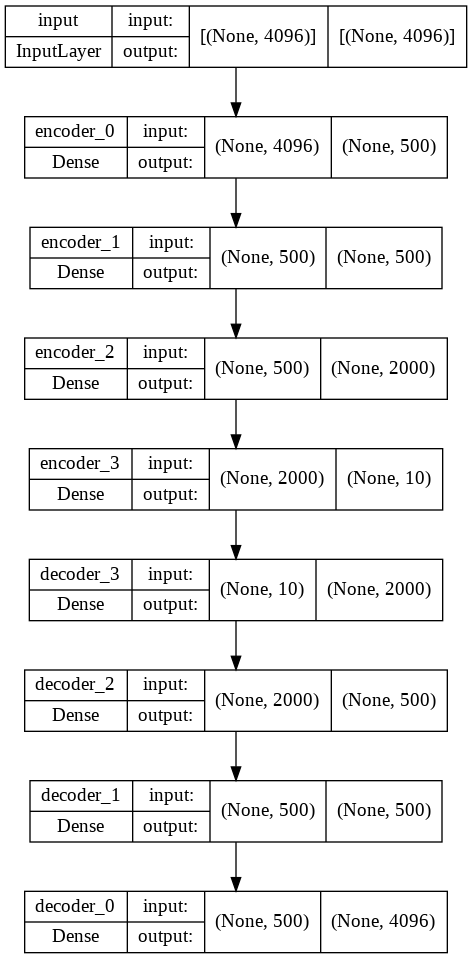

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)
from IPython.display import Image
Image(filename='autoencoder.png')

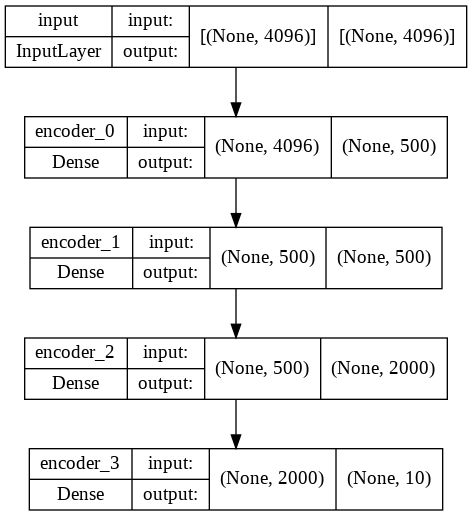

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(encoder, to_file='encoder.png', show_shapes=True)
from IPython.display import Image
Image(filename='encoder.png')

In [ ]:
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x, x, batch_size=batch_size, epochs=pretrain_epochs)

Epoch 1/15
1/1 [==============================] - 1s 667ms/step - loss: 0.0013
Epoch 2/15
1/1 [==============================] - 0s 116ms/step - loss: 0.0013
Epoch 3/15
1/1 [==============================] - 0s 125ms/step - loss: 0.0013
Epoch 4/15
1/1 [==============================] - 0s 112ms/step - loss: 0.0013
Epoch 5/15
1/1 [==============================] - 0s 115ms/step - loss: 0.0013
Epoch 6/15
1/1 [==============================] - 0s 114ms/step - loss: 0.0013
Epoch 7/15
1/1 [==============================] - 0s 125ms/step - loss: 0.0013
Epoch 8/15
1/1 [==============================] - 0s 119ms/step - loss: 0.0013
Epoch 9/15
1/1 [==============================] - 0s 115ms/step - loss: 0.0013
Epoch 10/15
1/1 [==============================] - 0s 112ms/step - loss: 0.0013
Epoch 11/15
1/1 [==============================] - 0s 120ms/step - loss: 0.0013
Epoch 12/15
1/1 [==============================] - 0s 116ms/step - loss: 0.0013
Epoch 13/15
1/1 [==============================] 

In [ ]:
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

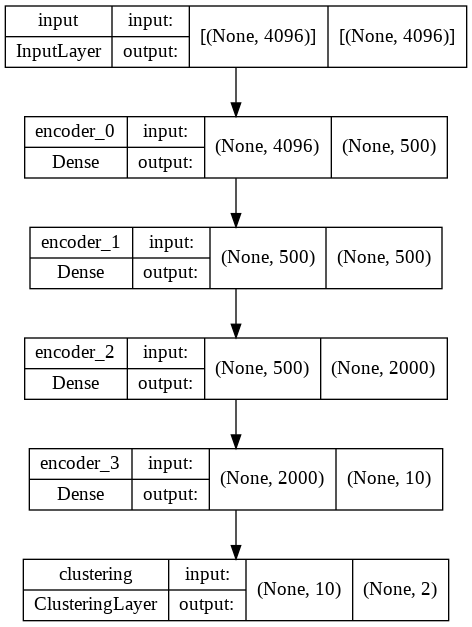

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png')

In [ ]:
model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

In [ ]:
encoder.predict(x)

array([[-4.15127637e-04,  6.78610086e-05, -1.05089322e-03,
        -3.99042328e-04, -2.87595030e-04,  1.50717387e-04,
        -6.35140343e-04,  1.03451475e-03, -9.11934418e-04,
        -1.27478328e-04],
       [-4.55014524e-04,  4.12890804e-04, -1.44814095e-03,
        -4.19057062e-04, -7.99106550e-04,  9.27927729e-04,
        -8.32494232e-04,  1.20404642e-03, -8.09301389e-04,
         6.37704565e-04],
       [-5.18181711e-04, -2.24244795e-05, -8.39211803e-04,
        -7.67813064e-04, -2.84668698e-04,  2.08137499e-05,
        -7.32369837e-04,  1.15515175e-03, -6.81295642e-04,
        -2.83108413e-04],
       [-6.23490429e-04, -1.58947369e-04, -1.28145877e-03,
        -3.90456698e-04, -7.26791855e-04,  5.55420993e-04,
        -5.49553079e-04,  1.67330576e-03, -1.31182349e-03,
        -8.40460067e-04],
       [-1.00668019e-03,  2.57909123e-05, -8.78535269e-04,
        -7.97578832e-04, -3.45002307e-04,  5.19346853e-04,
        -8.02037015e-04,  1.38813606e-03, -1.52577227e-03,
        -3.

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x))

In [ ]:
y_pred_last = np.copy(y_pred)
y_pred_last

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int32)

In [ ]:
np.array(train_data['classid'].values.tolist())

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])